# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Rodrigo López Aguilera - A01793071
*   Diego Carrera Nicholls - A00464290
*   Guillermo Alfonso Muñiz Hermosillo - A01793101


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, PowerTransformer


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
SEED=13

# **Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.

In [3]:
df = pd.read_csv('./Facebook_metrics/dataset_Facebook.csv', sep=';', engine='python')
new_columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'}
df.rename(columns=new_columns, inplace=True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df = df[['Category', 'Page total likes', 'Type', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid', 'LPE']].copy()
df.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


In [5]:
df['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [6]:
# labelenconder = LabelEncoder()
# type_encoded = labelenconder.fit_transform(df['Type'])
# df['Type'] = type_encoded

In [7]:

df.describe(include='all')

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
count,500.000000,500.000000,500,500.000000,500.000000,500.000000,499.000000,500.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Photo,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,426,NaN,NaN,NaN,NaN,NaN
mean,1.880000,123194.176000,NaN,7.038000,7.840000,4.150000,0.278557,609.986000
std,0.852675,16272.813214,NaN,3.307936,4.368589,2.030701,0.448739,612.725618
min,1.000000,81370.000000,NaN,1.000000,1.000000,1.000000,0.000000,9.000000
25%,1.000000,112676.000000,NaN,4.000000,3.000000,2.000000,0.000000,291.000000
50%,2.000000,129600.000000,NaN,7.000000,9.000000,4.000000,0.000000,412.000000
75%,3.000000,136393.000000,NaN,10.000000,11.000000,6.000000,1.000000,656.250000


# **Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.

In [8]:
y = df['LPE']
X = df.loc[:, df.columns != 'LPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=SEED)

In [9]:
print( "X Entrenamiento y validación",  X_train.shape)
print( "X Pruebas", X_test.shape)

print( "Y Entrenamiento y validación", y_train.shape)
print( "Y Pruebas", y_test.shape)

X Entrenamiento y validación (400, 7)
X Pruebas (100, 7)
Y Entrenamiento y validación (400,)
Y Pruebas (100,)


# **Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [10]:
def RMSE(y, yhat) -> float:
    return np.sqrt(np.mean(np.square(y - yhat)))

def MAE(y, yhat) -> float:
    return np.mean(np.absolute(yhat - y))

def MAPE(y, yhat) -> float:
    return np.mean(np.absolute((y - yhat) / y)) * 100

# **Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo
    
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

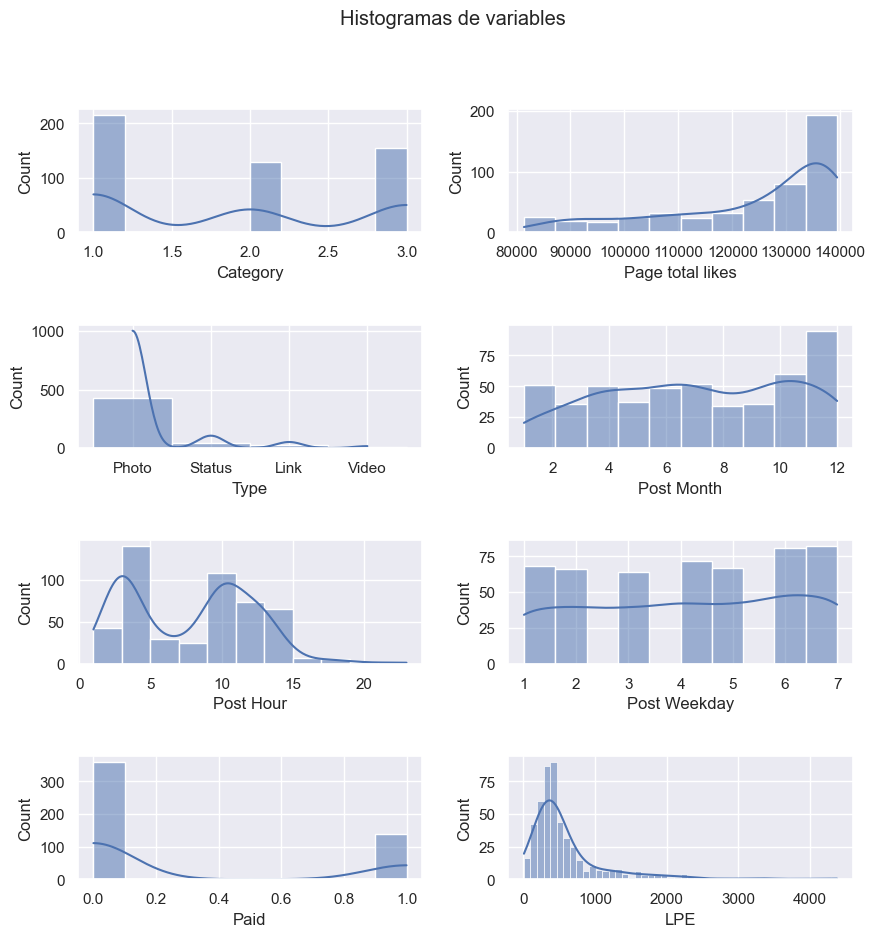

In [11]:
to_analyze = ['Category', 'Page total likes', 'Type', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid', 'LPE']
fig, ax  = plt.subplots(4, 2, figsize=(10, 10))
plt.suptitle('Histogramas de variables')
plt.subplots_adjust(hspace=0.75, wspace=0.25)
for i, col in enumerate(to_analyze):
    sns.histplot(data=df, x=col, ax=ax[i//2, i%2], kde=True).set(xlabel=col)

plt.show()

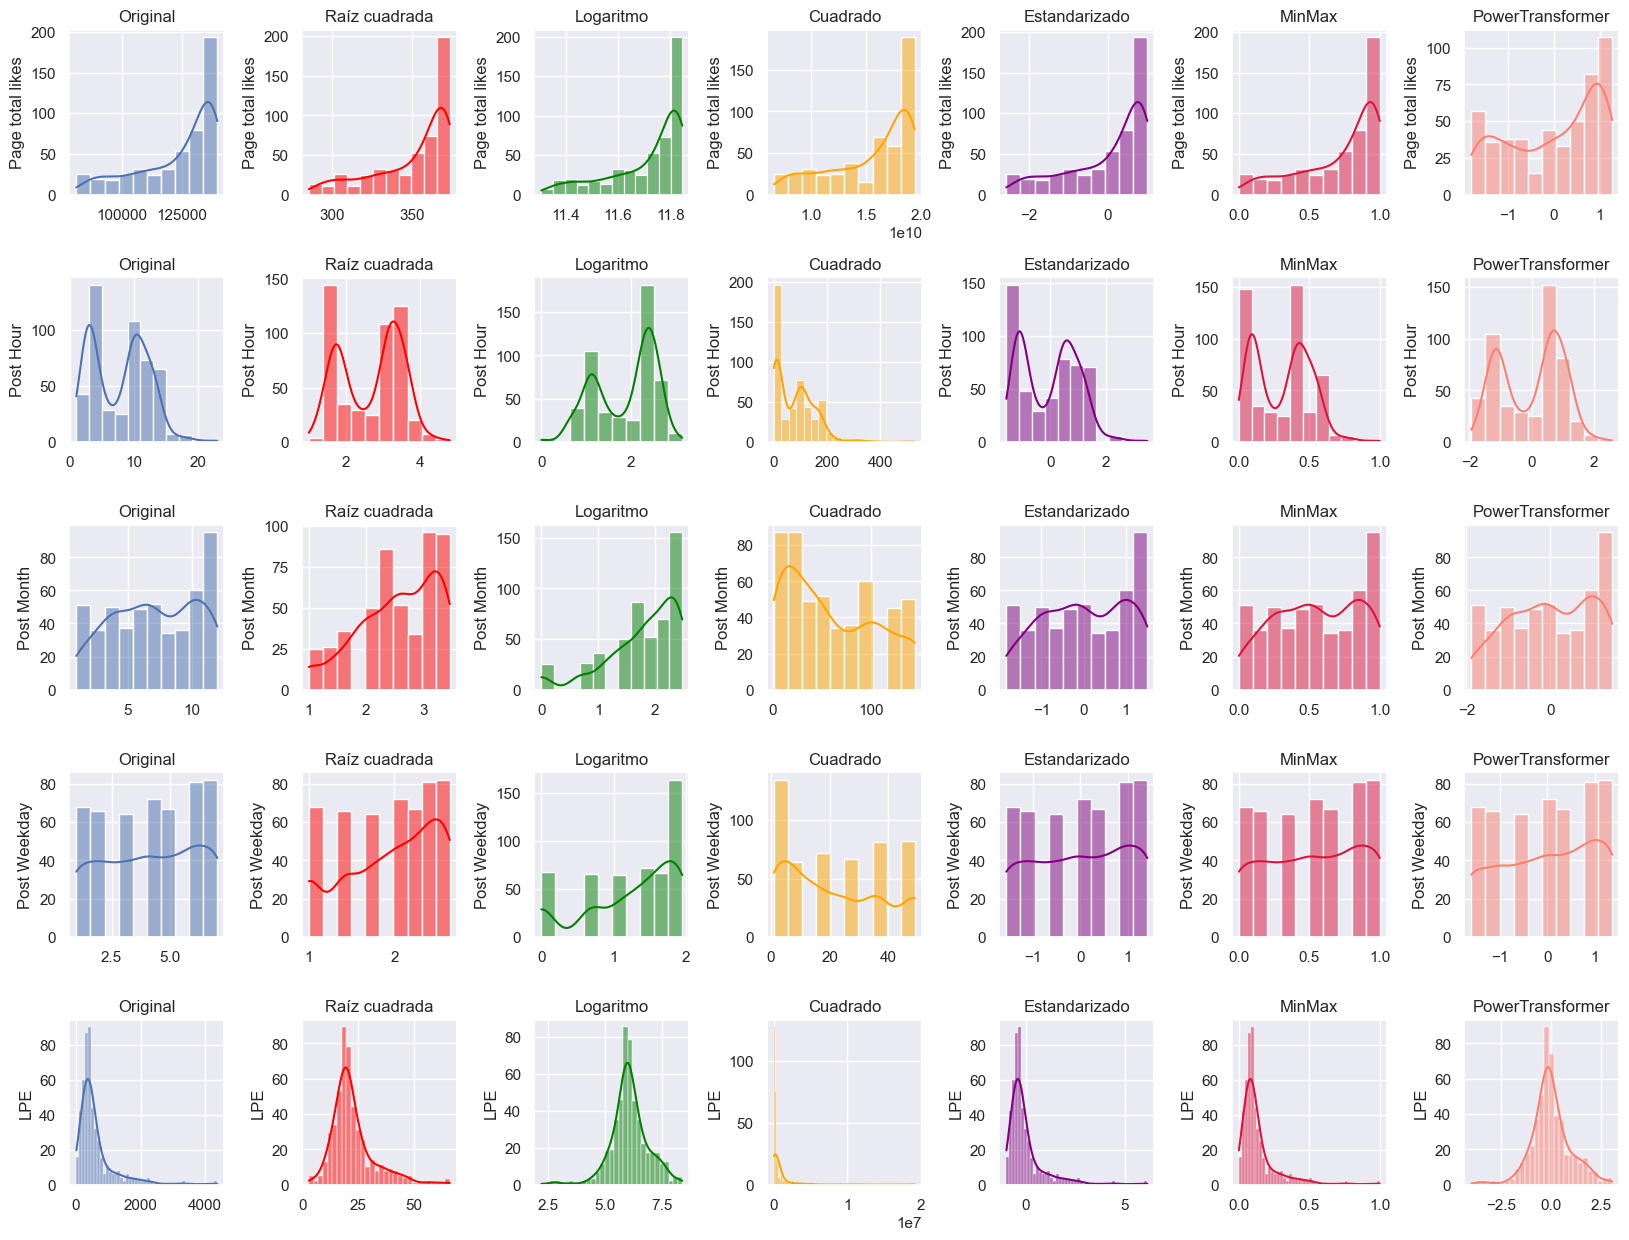

In [12]:
scaler = StandardScaler()
minmax = MinMaxScaler()
power_transformer = PowerTransformer()
# posibles transformaciones
to_transform_numerical = [
    'Page total likes', 
    'Post Hour',
    'Post Month', 
    'Post Weekday', 
    'LPE'
] 

fig, axes = plt.subplots( len(to_transform_numerical), 7, figsize=(20, 15))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i, col in enumerate(to_transform_numerical):
    # plt.subplot(len(to_transform_numerical), 4, i*4+1)

    standard_scaled = scaler.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    min_max_scaled  = minmax.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    power_scaled    = power_transformer.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    
    sns.histplot(data=df, x=col,            ax=axes[i, 0], kde=True).set(title='Original', xlabel='', ylabel=col)
    sns.histplot(data=np.sqrt(df[col]),     ax=axes[i, 1], kde=True, color="red").set(title='Raíz cuadrada', xlabel='', ylabel=col)
    sns.histplot(data=np.log(df[col]),      ax=axes[i, 2], kde=True, color="green").set(title='Logaritmo', xlabel='', ylabel=col)
    sns.histplot(data=np.power(df[col], 2), ax=axes[i, 3], kde=True, color="orange").set(title='Cuadrado', xlabel='', ylabel=col)
    sns.histplot(data=standard_scaled,      ax=axes[i, 4], kde=True, color="purple").set(title='Estandarizado', xlabel='', ylabel=col)
    sns.histplot(data=min_max_scaled,       ax=axes[i, 5], kde=True, color="crimson").set(title='MinMax', xlabel='', ylabel=col)
    sns.histplot(data=power_scaled,         ax=axes[i, 6], kde=True, color="salmon").set(title='PowerTransformer', xlabel='', ylabel=col)
    
  

In [13]:
"""
Category -> categorical
Page total likes -> numerical
Type -> categorical
Post Month -> discret
Post Hour -> discrete
Post Weekday -> discrete
Paid -> categorical (float)
LPE -> discrete
"""

categorical = ['Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Type']

numerical = ['Page total likes']

X.describe()

,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000
mean,1.880000,123194.176000,7.038000,7.840000,4.150000,0.278557
std,0.852675,16272.813214,3.307936,4.368589,2.030701,0.448739
min,1.000000,81370.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,112676.000000,4.000000,3.000000,2.000000,0.000000
50%,2.000000,129600.000000,7.000000,9.000000,4.000000,0.000000
75%,3.000000,136393.000000,10.000000,11.000000,6.000000,1.000000
max,3.000000,139441.000000,12.000000,23.000000,7.000000,1.000000


In [14]:
X.dtypes

Category              int64
Page total likes      int64
Type                 object
Post Month            int64
Post Hour             int64
Post Weekday          int64
Paid                float64
dtype: object

In [15]:
# numeric_pipeline = Pipeline(steps=[
#   ('median', SimpleImputer(strategy='median')),
#   ('scaling', StandardScaler())
# ])

# categorical_pipeline = Pipeline(steps=[
#   ('imputacionModa', SimpleImputer(strategy='most_frequent')),
# ])


# oneHot_pipeline = Pipeline(steps=[
#   ('oneHot', OneHotEncoder(drop='first'))
# ])

# pipeline = ColumnTransformer(
#   transformers=[
#     ('numeric', numeric_pipeline, numerical),
#     ('categoric', categorical_pipeline, categorical),
#     ('oneHotEncoder', oneHot_pipeline, categorical)
#   ],
#   remainder='passthrough'
# )

# categoricas_numericas = ['Category']
# categoricas_numericas = ['Category', 'Paid']
# numericas = ['Page total likes', 'Post Month', 'Post Hour', 'Post Weekday']
# onehot = ['Type']


# pipeline_numericas = Pipeline(steps=[
#   ('median_imputer', SimpleImputer(strategy='median')),
#   ('power_transformer', StandardScaler())
# ]);

# pipeline_categoricas_numericas = Pipeline(steps=[
#   ('mode_imputer', SimpleImputer(strategy='most_frequent')),
# ]);

# pipeline_onehot = Pipeline(steps=[
#   ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
# ]);

# column_transformer = ColumnTransformer(
#     transformers=[
#         ('categoric', pipeline_categoricas_numericas, categoricas_numericas),
#         ('onehot',    pipeline_onehot,                onehot),
#         ('numeric',   pipeline_numericas,             numericas),
#     ],
#     remainder='passthrough'
# )

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
numeric_features = ['Page total likes']


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])
categorical_features = ['Category', 'Paid', 'Post Month', 'Post Hour', 'Post Weekday']

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])
onehot_features = ['Type']


column_transformer = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_features),
    ('onehot',      onehot_transformer,      onehot_features),
    ('numeric',     numeric_transformer,     numeric_features),
])



In [16]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed.shape
xtdf = pd.DataFrame(X_transformed)
xtdf.head()

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,8.0,12.0,1.0,1.0,0.0,0.0,0.550221
1,2.0,0.0,12.0,10.0,5.0,1.0,0.0,0.0,0.989743
2,3.0,1.0,1.0,16.0,6.0,1.0,0.0,0.0,-2.199340
3,2.0,0.0,10.0,3.0,4.0,1.0,0.0,0.0,0.842770
4,1.0,0.0,10.0,10.0,7.0,1.0,0.0,0.0,0.819823


# **Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. 

Para ello particiónalos en 100 para validación y 300 para entrenamiento. 

Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. 

Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. 

Consulta su documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [17]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(
    X_train, y_train, test_size=0.25, random_state=SEED
)
print( "X Entrenamiento y validación",  X_train_dummy.shape)
print( "X Pruebas", X_test_dummy.shape)

print( "Y Entrenamiento y validación", y_train_dummy.shape)
print( "Y Pruebas", y_test_dummy.shape)

X Entrenamiento y validación (300, 7)
X Pruebas (100, 7)
Y Entrenamiento y validación (300,)
Y Pruebas (100,)


In [18]:
# dummy_regressor = DummyRegressor(strategy='mean')
# X_train_dummy_transformed = pipeline.fit_transform(X_train_dummy)

# dummy_regressor.fit(X_train_dummy_transformed, y_train_dummy)


# y_predicted_dummy = dummy_regressor.predict(X_test_dummy)

# print("RMSE:\t %.2f" % ( RMSE(y_test_dummy, y_predicted_dummy) ) )
# print("MAE:\t %.2f" % ( MAE(y_test_dummy, y_predicted_dummy) ) )
# print("MAPE:\t %.2f" % ( MAPE(y_test_dummy, y_predicted_dummy) ) )



In [19]:
# Creamos un Dummy Regressor y lo implementamos en nuestros datos de entrenamiento y validacion
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

scores_RMSE = []
scores_MAE = []
scores_MAPE = []
scores_MAPES = []
scores_MSE = []

def y_transformer(y):
    return np.log(y)

def y_inverse_transformer(y):
    return np.exp(y)

def dummyFuncion(X, Y):
    
    dummy_regr = DummyRegressor()
    pipe = Pipeline(steps=[('transformer', column_transformer), ('model', dummy_regr)])
    modelo = TransformedTargetRegressor(
        regressor=pipe,
        func=y_transformer,
        inverse_func=y_inverse_transformer
    )

    modelo.fit(X, Y)
    yhat = modelo.predict(X)

    scores_RMSE.append(RMSE(Y, yhat))
    scores_MAE.append(MAE(Y, yhat))
    scores_MAPE.append(MAPE(Y, yhat))
    scores_MAPES.append(mean_absolute_percentage_error(Y, yhat))
    scores_MSE.append(mean_squared_error(Y, yhat))


dummyFuncion(X_train_dummy, y_train_dummy)
dummyFuncion(X_test_dummy, y_test_dummy)
dummyFuncion(X_train, y_train)
dummyFuncion(X_test, y_test)


data = {'RMSE': scores_RMSE, 'MAE': scores_MAE, 'MAPE': scores_MAPE, 'MAPES': scores_MAPES, 'MSE': scores_MSE}
scores = pd.DataFrame(data, index=['Dummy', 'DummyV', 'Entrenamiento', 'Validacion'])
scores

,RMSE,MAE,MAPE,MAPES,MSE
Dummy,614.836201,330.855611,105.057072,1.050571,378023.553562
DummyV,727.179642,391.947271,74.027894,0.740279,528790.231102
Entrenamiento,645.295294,345.641281,97.671846,0.976718,416406.016112
Validacion,599.674515,304.960720,82.216186,0.822162,359609.523659


# **Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. 

Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. 

Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? 

NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [20]:
X_train_transformed = column_transformer.transform(X_train)

In [21]:
repeated_k_fold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=SEED)

In [22]:
modelos, nombres = [], []
modelos.append(LinearRegression())
nombres.append('Regresión Lineal')

modelos.append(RandomForestRegressor())
nombres.append('Random Forest')

modelos.append(MLPRegressor(max_iter=20000))
nombres.append('Red Neuronal')

In [23]:
resultados = []
for i in range(len(modelos)):
    pipe = Pipeline(steps=[('transformer', column_transformer), ('model', modelos[i])])
    model = TransformedTargetRegressor(
    regressor=pipe, 
    func=np.log, 
    inverse_func=np.exp,
    )
    my_metrics = {
      'RMSE': make_scorer(RMSE, greater_is_better=True),
      'MAE': make_scorer(MAE, greater_is_better=True),
      'MAPE': make_scorer(MAPE, greater_is_better=True)
    }
    scores = cross_validate(
      model, 
      X_train, 
      y_train, 
      cv=repeated_k_fold, 
      scoring=my_metrics, 
      n_jobs=-1,
    )

    resultados.append(scores)

    print("%-20s\tRMSE: %.4f\tMAE: %.4f\tMAPE: %.4f" % (
      nombres[i],
      np.mean(scores['test_RMSE']),
      np.mean(scores['test_MAE']),
      np.mean(scores['test_MAPE'])
    ))

Regresión Lineal    	RMSE: 541.2485	MAE: 287.1032	MAPE: 85.7294
Random Forest       	RMSE: 546.9163	MAE: 302.4959	MAPE: 87.6783
Red Neuronal        	RMSE: 585.1126	MAE: 322.5190	MAPE: 95.0075


# **Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

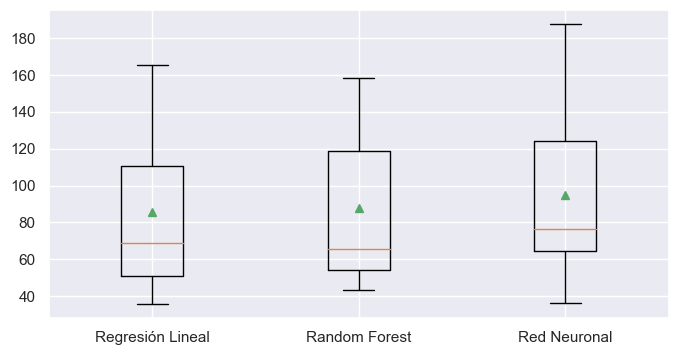

In [24]:
# Inciso 4d: Imprimir tambien los diagramas de caja y bigotes de los tres modelos con la
# métrica “recall”.
sns.set(rc={'figure.figsize':(8,4)})
boxPlotsMape = []
for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  boxPlotsMape.append(rr)

plt.boxplot(boxPlotsMape, labels=nombres, showmeans=True)
plt.show()

# **Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [25]:
def plot_importante(importance):
  for i,v in enumerate(importance['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
  plt.show()

In [26]:
mlp_regressor = TransformedTargetRegressor(
    regressor=MLPRegressor(random_state=SEED),
    func=np.log1p,
    inverse_func=np.expm1
)

fullPipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('transformed_regressor', mlp_regressor)
])

hidden_layers = [(i, i) for i in range(5, 20, 3)]
param_grid = {    
    'transformed_regressor__regressor__max_iter': [5000],
    'transformed_regressor__regressor__hidden_layer_sizes': hidden_layers,
    'transformed_regressor__regressor__alpha': [0.0001, 0.001],
    'transformed_regressor__regressor__learning_rate_init': [0.001, 0.01, 0.1],    
}

mlp_search = GridSearchCV(
    fullPipeline, 
    param_grid, 
    cv=repeated_k_fold,
    scoring=make_scorer(MAPE, greater_is_better=True),
    n_jobs=-1,
)

mlp_search.fit(X_train, y_train)

print('Mejor valor de obtenido con la mejor combinación: {:.5f}'.format(mlp_search.best_score_))
print('Mejor combinación de valores encontrados de los hiperparámetros:', mlp_search.best_params_)
print('Métrica utilizada:', mlp_search.scoring)

Mejor valor de obtenido con la mejor combinación: 106.51188
Mejor combinación de valores encontrados de los hiperparámetros: {'transformed_regressor__regressor__alpha': 0.0001, 'transformed_regressor__regressor__hidden_layer_sizes': (11, 11), 'transformed_regressor__regressor__learning_rate_init': 0.1, 'transformed_regressor__regressor__max_iter': 5000}
Métrica utilizada: make_scorer(MAPE)


# **Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

Feature: 0, Score: 0.00008
Feature: 1, Score: 0.00282
Feature: 2, Score: 6.48977
Feature: 3, Score: 0.00890
Feature: 4, Score: 0.00861
Feature: 5, Score: 0.98217
Feature: 6, Score: 5.48563
Feature: 7, Score: 0.49522
Feature: 8, Score: 32.84229


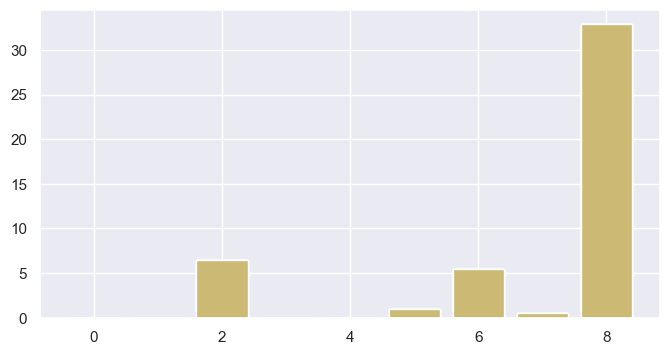

In [33]:
final_mlp_regressor = MLPRegressor(
  hidden_layer_sizes=(11, 11),
  alpha=0.0001,
  learning_rate_init=0.1,
  max_iter=5000, 
  random_state=SEED
)

final_MLP = Pipeline(steps=[
    ('model', TransformedTargetRegressor(regressor=final_mlp_regressor,func=np.log1p,inverse_func=np.expm1))
])

final_MLP.fit(X_train_transformed, y_train)
importance = permutation_importance(final_MLP, X_train_transformed, y_train, n_repeats=10, n_jobs=-1)

plot_importante(importance)



# **Ejercicio-10.**

 Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [34]:
rf_regressor = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=SEED), 
    func=np.log1p,
    inverse_func=np.expm1
)

fullPipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('transformed_regressor', rf_regressor)
])


param_grid = {    
    'transformed_regressor__regressor__n_estimators': [50, 100, 200],
    'transformed_regressor__regressor__max_features': ['sqrt', 'log2'],
    'transformed_regressor__regressor__max_depth': [4, 5, 5, 6, 7, 8],
    'transformed_regressor__regressor__criterion': ['squared_error', 'absolute_error'],
}

rf_search = GridSearchCV(
    fullPipeline, 
    param_grid, 
    cv=repeated_k_fold,
    scoring=make_scorer(MAPE, greater_is_better=True),
    n_jobs=-1,
)

rf_search.fit(X_train, y_train)

print('Mejor valor de obtenido con la mejor combinación: {:.5f}'.format(rf_search.best_score_))
print('Mejor combinación de valores encontrados de los hiperparámetros:', rf_search.best_params_)
print('Métrica utilizada:', rf_search.scoring)

Mejor valor de obtenido con la mejor combinación: 84.78026
Mejor combinación de valores encontrados de los hiperparámetros: {'transformed_regressor__regressor__criterion': 'squared_error', 'transformed_regressor__regressor__max_depth': 7, 'transformed_regressor__regressor__max_features': 'sqrt', 'transformed_regressor__regressor__n_estimators': 50}
Métrica utilizada: make_scorer(MAPE)


Feature: 0, Score: 0.13352
Feature: 1, Score: 0.03373
Feature: 2, Score: 0.13614
Feature: 3, Score: 0.13062
Feature: 4, Score: 0.15898
Feature: 5, Score: 0.18230
Feature: 6, Score: 0.54344
Feature: 7, Score: 0.01542
Feature: 8, Score: 0.19298


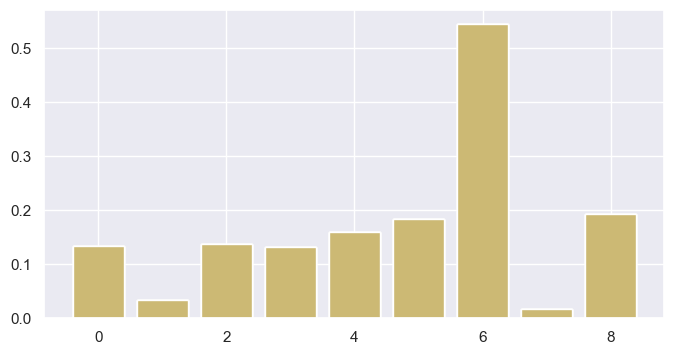

In [35]:
rfr_regressor = RandomForestRegressor(
    n_estimators=50,
    max_features='log2',
    max_depth=7,
    criterion='squared_error',
    random_state=SEED
)

final_RF = Pipeline(steps=[
    ('model', TransformedTargetRegressor(regressor=rfr_regressor,func=np.log1p,inverse_func=np.expm1))
])

final_RF.fit(X_train_transformed, y_train)
importance = permutation_importance(final_RF, X_train_transformed, y_train, n_repeats=10, n_jobs=-1)
plot_importante(importance)


# **Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [48]:
lr_regressor = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log1p,
    inverse_func=np.expm1
)

fullPipeline = Pipeline(steps=[
  ('preprocessor', column_transformer),
  ('transformed_regressor', lr_regressor)
])


# da 85 sin nada
param_grid = [
  {}, 
  # {
  #   'transformed_regressor__regressor__fit_intercept': [True, False],
  # }
]

lr_search = GridSearchCV(
    fullPipeline, 
    param_grid, 
    cv=repeated_k_fold,
    scoring=make_scorer(MAPE, greater_is_better=True),
    n_jobs=-1,
)

lr_search.fit(X_train, y_train)

print('Mejor valor de obtenido con la mejor combinación: {:.5f}'.format(lr_search.best_score_))
print('Mejor combinación de valores encontrados de los hiperparámetros:', lr_search.best_params_)
print('Métrica utilizada:', lr_search.scoring)

Mejor valor de obtenido con la mejor combinación: 85.81391
Mejor combinación de valores encontrados de los hiperparámetros: {}
Métrica utilizada: make_scorer(MAPE)


Feature: 0, Score: 0.12587
Feature: 1, Score: 0.03992
Feature: 2, Score: 0.13227
Feature: 3, Score: 0.12723
Feature: 4, Score: 0.16747
Feature: 5, Score: 0.19176
Feature: 6, Score: 0.57100
Feature: 7, Score: 0.01636
Feature: 8, Score: 0.18615


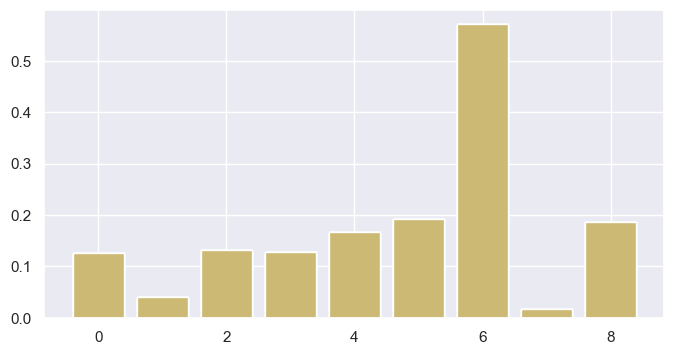

In [49]:
lr_regressor = LinearRegression()

final_LR = Pipeline(steps=[
    ('model', TransformedTargetRegressor(regressor=rfr_regressor,func=np.log1p,inverse_func=np.expm1))
])

final_LR.fit(X_train_transformed, y_train)
importance = permutation_importance(final_LR, X_train_transformed, y_train, n_repeats=10, n_jobs=-1)
plot_importante(importance)


# **Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

In [ ]:
None

###**Fin de la Actividad de la semana 7.**